## Project2: EDA on Vehicle Insurance Customer Data
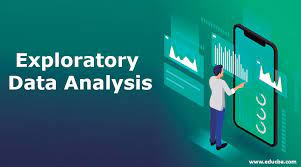

### Aim of Project: A company has customer data that contains 8 columns of customer details and another table having name customer_policy data contains the policy details of the customer.  The company intends to offer some discount in premium for certain customers. To do that they ask their Data scientist team to get some information. Hence, following tasks DS team decided to perform:

In [3]:
# import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load CSV file
df1 = pd.read_csv("customer_details.csv")

df2 = pd.read_csv("customer_policy_details.csv")


### 1. Add the column names to both datasets:

In [ ]:
'''Column Name for customer details table:
           customer_id, 
           Gender,
           age, 
           driving licence present,
           region code, 
           previously insured, 
           vehicle age 
           and vehicle damage, in respective order. '''

In [7]:
# Adding column name to customer details
df1.columns = ['customer_id','Gender','age','driving licence present','region code', 'previously insured','vehicle age','vehicle damage']

# see top 5 data
df1.head()


,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No


In [12]:
'''Column Name for customer_policy table:
           customer_id, 
           annual premium (in Rs), 
           sales channel code, 
           vintage and response. '''

'Column Name for customer_policy table:\n           customer_id, \n           annual premium (in Rs), \n           sales channel code, \n           vintage and response. '

In [8]:
# Adding column name to customer_policy table
df2.columns = ['customer_id', 'annual premium (in Rs)', 'sales channel code', 'vintage','response']

# see top 5 data
df2.head(2)

,customer_id,annual premium (in Rs),sales channel code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0


## 2. Checking and Cleaning Data Quality:

### 1. Null values

### 1-A: Generate a summary of count of all the null values column wise

In [9]:

# ------ customer_detail dataset ---------#

df1_n = df1.isnull()  # it returns true where values are missing

# count no of values that are missing column wise
df1.isnull().sum()


customer_id                386
Gender                     368
age                        368
driving licence present    393
region code                392
previously insured         381
vehicle age                381
vehicle damage             407
dtype: int64

In [10]:
# ------ customer_policy dataset ---------#

df2_n = df2.isnull()  # it returns true where values are missing
# count no of values that are missing column wise
df2.isnull().sum()


customer_id               387
annual premium (in Rs)    346
sales channel code        400
vintage                   388
response                  361
dtype: int64

### 1-B: Drop Null values for customer_id because central tendencies for id’s is not feasible.

In [12]:

# ------ customer_detail dataset ---------#

# it drops all rows where values are missing in customer_id column
df1.dropna(subset=['customer_id'],axis = 0,inplace = True)

# In Data set some rows gets deleted so we have to arrange indexing
df1.reset_index(drop = True,inplace=True)


In [13]:

# ------ customer_policy dataset ---------#

# it drops all rows where values are missing in customer_id column
df2.dropna(subset=['customer_id'],axis = 0,inplace = True)

# In Data set some rows gets deleted so we have to arrange indexing
df2.reset_index(drop = True,inplace=True)

### 1-C Replace all null values for numeric columns by mean.

In [14]:

# ------ customer_detail dataset ---------#

#Replacing the null value of age by its mean value
df1['age'].fillna(df1['age'].mean(),inplace=True)

#Replacing the null value of region code by its mean value
df1['region code'].fillna(df1['region code'].mean(),inplace=True)

df1.head()
print(df1.dtypes)

customer_id                float64
Gender                      object
age                        float64
driving licence present    float64
region code                float64
previously insured         float64
vehicle age                 object
vehicle damage              object
dtype: object


In [15]:
# ------ customer_policy dataset ---------#

# Replacing the null values of annual premium by its mean value
df2['annual premium (in Rs)'].fillna(df2['annual premium (in Rs)'].mean(),inplace = True)

# Replacing the null values of sales channel code by its mean value
df2['sales channel code'].fillna(df2['sales channel code'].mean(),inplace = True)

# Replacing the null values of vintage by its mean value
df2['vintage'].fillna(df2['vintage'].mean(),inplace = True)

df2.head()

,customer_id,annual premium (in Rs),sales channel code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0


### 1-D Replace all null values for Categorical value by mode.

In [20]:

# ------ customer_detail dataset ---------#

# it replaces the null values of driving licence present by its mode value.
df1['driving licence present'].fillna (df1['driving licence present'].mode()[0], inplace=True)

# it replaces the null values of previously insured by its mode value.
df1['previously insured'].fillna (df1['previously insured'].mode()[0], inplace=True)

# it replaces the null values of previously insured by its mode value.
df1['Gender'].fillna (df1['Gender'].mode()[0], inplace=True)

# it replaces the null values of vehicle damage by its mode value.
df1['vehicle damage'].fillna (df1['vehicle damage'].mode()[0], inplace=True)

# it replaces the null values of vehicle age by its mode value.
df1['vehicle age'].fillna (df1['vehicle age'].mode()[0], inplace=True)
df1.head()

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No


In [21]:
# ------ customer_policy dataset ---------#

# it replaces the null values of responce by its mode value.
df2['response'].fillna(df2['response'].mode()[0], inplace=True)

df2.head()

,customer_id,annual premium (in Rs),sales channel code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0


In [22]:
# cross check whether any null data present or not
# ------ customer_detail dataset ---------#
df1.isnull().sum()

customer_id                0
Gender                     0
age                        0
driving licence present    0
region code                0
previously insured         0
vehicle age                0
vehicle damage             0
dtype: int64

In [23]:
# ------ customer_policy dataset ---------#
df2.isnull().sum()

customer_id               0
annual premium (in Rs)    0
sales channel code        0
vintage                   0
response                  0
dtype: int64

### 2. Outliers 
#### Outliers are those data points that are significantly different from the rest of the dataset.

In [16]:
# summary of statastical parameter for Data frame columnwise
df1.describe()

,customer_id,age,driving licence present,region code,previously insured
count,380723.000000,380723.000000,380723.000000,380723.000000,380723.000000
mean,190548.776244,38.822788,0.997870,26.389436,0.457800
std,110016.805160,15.504826,0.046105,13.223671,0.498217
min,1.000000,20.000000,0.000000,0.000000,0.000000
25%,95269.500000,25.000000,1.000000,15.000000,0.000000
50%,190543.000000,36.000000,1.000000,28.000000,0.000000
75%,285822.500000,49.000000,1.000000,35.000000,1.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000


In [17]:
df2.describe()

,customer_id,annual premium (in Rs),sales channel code,vintage,response
count,380722.000000,380722.000000,380722.000000,380722.000000,380722.000000
mean,190547.491663,30563.999774,112.036687,154.347192,0.122410
std,110013.824148,17190.147550,54.177046,83.628096,0.327759
min,1.000000,2630.000000,1.000000,10.000000,0.000000
25%,95276.250000,24416.000000,29.000000,82.000000,0.000000
50%,190536.500000,31656.000000,131.000000,154.000000,0.000000
75%,285818.750000,39391.750000,152.000000,227.000000,0.000000
max,381109.000000,540165.000000,163.000000,299.000000,1.000000


### 2-A Generate a summary of count of all the outliers column wise

In [24]:

# Define function that returns outlier
def finding_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    outlier = df[((df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr)))]
    return outlier

# Define function that returns box-plot to visulize outlier

def boxplot(df,feature):
    df.boxplot(column=[feature])
    plt.grid(False)
    plt.show()

Number of outliers in outlier_age: 0
Maximum outlier value : nan
Minimum outlier value : nan


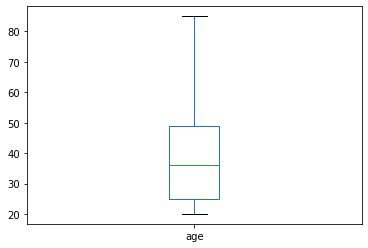

In [25]:
# ------ customer_detail dataset ---------#
# In this dataset 2 features have numeric values, so we are finding outlier for the same

outlier_age= finding_outliers(df1['age'])
print('Number of outliers in outlier_age:',len(outlier_age))
print('Maximum outlier value :',outlier_age.max())
print('Minimum outlier value :',outlier_age.min())

boxplot(df1,'age')

Number of outliers in region code : 0
Maximum outlier value : nan
Minimum outlier value : nan


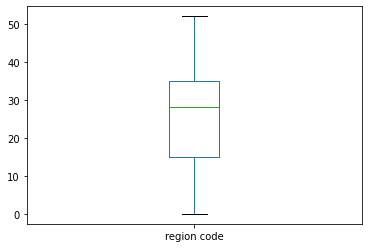

In [26]:
outlier_region= finding_outliers(df1['region code'])
print('Number of outliers in region code :',len(outlier_region))
print('Maximum outlier value :',outlier_region.max())
print('Minimum outlier value :',outlier_region.min())

boxplot(df1,'region code')

Number of outliers in annual premium (in Rs) : 10332
Maximum outlier value : 540165.0
Minimum outlier value : 61858.0


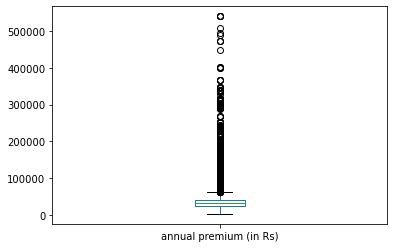

In [27]:
# ------ customer_policy dataset ---------#
# In this dataset 3 features have numeric values, so we are finding outlier for the same

outlier_ann_prem= finding_outliers(df2['annual premium (in Rs)'])
print('Number of outliers in annual premium (in Rs) :',len(outlier_ann_prem))
print('Maximum outlier value :',outlier_ann_prem.max())
print('Minimum outlier value :',outlier_ann_prem.min())

boxplot(df2,'annual premium (in Rs)')

Number of outliers in sales channel code : 0
Maximum outlier value : nan
Minimum outlier value : nan


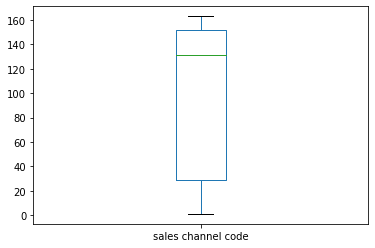

In [31]:
outlier_sales_cd= finding_outliers(df2['sales channel code'])
print('Number of outliers in sales channel code :',len(outlier_sales_cd))
print('Maximum outlier value :',outlier_sales_cd.max())
print('Minimum outlier value :',outlier_sales_cd.min())

boxplot(df2,'sales channel code')

Number of outliers in sales channel code : 0
Maximum outlier value : nan
Minimum outlier value : nan


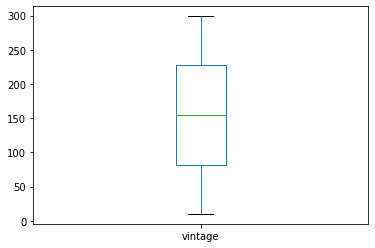

In [32]:
outlier_vintage= finding_outliers(df2['vintage'])
print('Number of outliers in sales channel code :',len(outlier_vintage))
print('Maximum outlier value :',outlier_vintage.max())
print('Minimum outlier value :',outlier_vintage.min())

boxplot(df2,'vintage')

### 2-B Replace all outlier values for numeric columns by mean.

In [33]:

# Define function that replace numeric column by its mean value

def replace_outlier(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    upper = df[~(df>(q3+1.5*iqr))].max()
    lower = df[~(df<(q1-1.5*iqr))].min()
    df = np.where(df>upper,df.mean(),np.where(df<lower,df.mean(),df))
    return df

# only annual premium (in Rs) in customer policy dataset have outliers so we are replacing with its mean value
df2['annual premium (in Rs)'] = replace_outlier(df2['annual premium (in Rs)'])

### 2-C Remove white spaces(leading and trailing)

In [35]:

# ------ customer_detail dataset ---------#
df1["Gender"]=df1["Gender"].str.strip()
df1["vehicle age"]=df1["vehicle age"].str.strip()
df1["vehicle damage"]=df1["vehicle damage"].str.strip()

df1.head()
# ------ customer_policy dataset ---------#
# This data set has all values of float type so no need to remove white space

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No


In [36]:
df2.head(5)

,customer_id,annual premium (in Rs),sales channel code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0


### 2-D: case correction(lower or upper, any one)

In [37]:

# ------ customer_detail dataset ---------#
df1["Gender"]=df1["Gender"].str.upper()
df1["vehicle age"]=df1["vehicle age"].str.upper()
df1["vehicle damage"]=df1["vehicle damage"].str.upper()

df1.head()
# ------ customer_policy dataset ---------#
# In this data set values are of float type so we are not concern about case correction

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,MALE,44.0,1.0,28.0,0.0,> 2 YEARS,YES
1,2.0,MALE,76.0,1.0,3.0,0.0,1-2 YEAR,NO
2,3.0,MALE,47.0,1.0,28.0,0.0,> 2 YEARS,YES
3,4.0,MALE,21.0,1.0,11.0,1.0,< 1 YEAR,NO
4,5.0,FEMALE,29.0,1.0,41.0,1.0,< 1 YEAR,NO


### 2-E Convert nominal data (categorical) into dummies

In [38]:
 
# Dummy variable: It is also called indicator varialbe that are used to label categories.so that feature can be used in machine learning application

# ------ customer_detail dataset ---------#
#In this data set feature vehicle damage has categorical value(YES/NO) 
# so we are converting (YES/NO)----->(1/0)

dummy_var = pd.get_dummies(df1["vehicle damage"]) 

dummy_var.head()


,NO,YES
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [39]:
# changing column name for dummy var
dummy_var.rename(columns={'NO':'vehicle-damage-No', 'YES':'vehicle-damage-Yes'}, inplace=True)

dummy_var.head()

,vehicle-damage-No,vehicle-damage-Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [40]:
# Drop vehicle damage from original data set df1
df1.drop('vehicle damage', axis = 1, inplace=True)


In [41]:
# Merge df1 with dummy var data frame using concat method
df1_new=pd.concat([df1,dummy_var],axis=1)
df1_new.head()

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle-damage-No,vehicle-damage-Yes
0,1.0,MALE,44.0,1.0,28.0,0.0,> 2 YEARS,0,1
1,2.0,MALE,76.0,1.0,3.0,0.0,1-2 YEAR,1,0
2,3.0,MALE,47.0,1.0,28.0,0.0,> 2 YEARS,0,1
3,4.0,MALE,21.0,1.0,11.0,1.0,< 1 YEAR,1,0
4,5.0,FEMALE,29.0,1.0,41.0,1.0,< 1 YEAR,1,0


### 2-F:  Drop Duplicates (duplicated rows)

In [42]:

# ------ customer_detail dataset ---------#
df1.drop_duplicates(inplace=True)

# ------ customer_policy dataset ---------#
df2.drop_duplicates(inplace=True)


## 3.Create a Master table for future use. Join the customer table and customer_policy table to get a master table using customer_id in both tables

In [43]:
master_data = pd.merge(df1_new,df2,on='customer_id')

master_data

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle-damage-No,vehicle-damage-Yes,annual premium (in Rs),sales channel code,vintage,response
0,1.0,MALE,44.0,1.0,28.0,0.0,> 2 YEARS,0,1,40454.0,26.0,217.0,1.0
1,2.0,MALE,76.0,1.0,3.0,0.0,1-2 YEAR,1,0,33536.0,26.0,183.0,0.0
2,3.0,MALE,47.0,1.0,28.0,0.0,> 2 YEARS,0,1,38294.0,26.0,27.0,1.0
3,4.0,MALE,21.0,1.0,11.0,1.0,< 1 YEAR,1,0,28619.0,152.0,203.0,0.0
4,5.0,FEMALE,29.0,1.0,41.0,1.0,< 1 YEAR,1,0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
380331,381105.0,MALE,74.0,1.0,26.0,1.0,1-2 YEAR,1,0,30170.0,26.0,88.0,0.0
380332,381106.0,MALE,30.0,1.0,37.0,1.0,< 1 YEAR,1,0,40016.0,152.0,131.0,0.0
380333,381107.0,MALE,21.0,1.0,30.0,1.0,< 1 YEAR,1,0,35118.0,160.0,161.0,0.0
380334,381108.0,FEMALE,68.0,1.0,14.0,0.0,> 2 YEARS,0,1,44617.0,124.0,74.0,0.0


## 4. Company needs some important information from the master table to make decisions for future growth.They needs following information:

### 4-A Gender wise average annual premium

Gender
FEMALE    29273.474247
MALE      29323.099677
Name: annual premium (in Rs), dtype: float64


<AxesSubplot:title={'center':'Gender vs average annual premium'}, xlabel='Gender'>

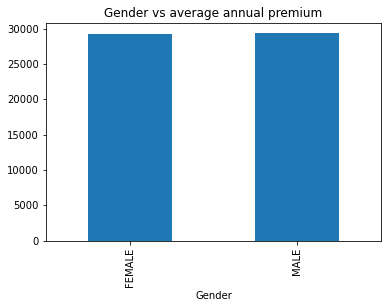

In [44]:

gender_data = master_data.groupby('Gender')['annual premium (in Rs)'].mean()

print(gender_data)

# Bar plot 
gender_data.plot.bar(title='Gender vs average annual premium')


### 4-B Age wise average annual premium

age
20.0    26342.073517
21.0    29751.791916
22.0    29946.848634
23.0    29838.344763
24.0    30125.557096
            ...     
81.0    29287.910702
82.0    36480.586199
83.0    28995.818172
84.0    35440.818182
85.0    26637.454525
Name: annual premium (in Rs), Length: 67, dtype: float64


<AxesSubplot:title={'center':'age vs average annual premium'}, xlabel='age'>

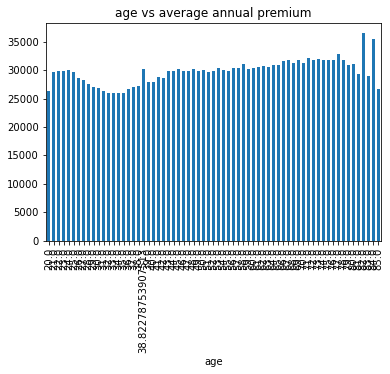

In [45]:

age_data = master_data.groupby('age')['annual premium (in Rs)'].mean()
print(age_data)

# Bar plot 
age_data.plot.bar(title='age vs average annual premium',width=0.6)



### 4-C: Is your data balanced between the genders?

In [46]:

# (Hint: Data is balanced if number of counts in each group is approximately same)

master_data.groupby('Gender').count()

,customer_id,age,driving licence present,region code,previously insured,vehicle age,vehicle-damage-No,vehicle-damage-Yes,annual premium (in Rs),sales channel code,vintage,response
Gender,,,,,,,,,,,,
FEMALE,174485,174485,174485,174485,174485,174485,174485,174485,174485,174485,174485,174485
MALE,205851,205851,205851,205851,205851,205851,205851,205851,205851,205851,205851,205851


### 4-D: Vehicle age wise average annual premium.

vehicle age
1-2 YEAR     29102.009839
< 1 YEAR     29188.150594
> 2 YEARS    32943.540830
Name: annual premium (in Rs), dtype: float64


<AxesSubplot:title={'center':'vehicle_age vs average annual premium'}, xlabel='vehicle age'>

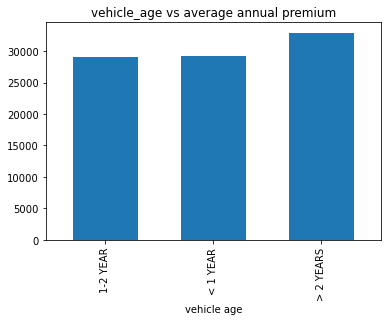

In [50]:
vehicle_age_data = master_data.groupby('vehicle age')['annual premium (in Rs)'].mean()
print(vehicle_age_data)

# Bar plot 
vehicle_age_data.plot.bar(title='vehicle_age vs average annual premium',width=0.6)

## 5.Is there any relation between Person Age and annual premium?

In [51]:
# Hint: use correlation function (Correlation describes the relationship between two variables). 
'''Correlation coefficient < -0.5           - Strong negative relationship
Correlation coefficient > 0.5            -  Strong positive relationship
0.5 < Correlation coefficient < 0.5   - There is no relationship. '''

corr_coeff=master_data['age'].corr(master_data['annual premium (in Rs)'])
print('Coefficient of Correlation is: ',corr_coeff)
if corr_coeff < -0.5 :
    print('Strong negative relationship')
elif corr_coeff > -0.5 and corr_coeff < 0.5:
    print('There is no relationship')
elif corr_coeff > 0.5:
    print('Strong positive relationship')

Coefficient of Correlation is:  0.0506575892861754
There is no relationship
